In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd drive/My\ Drive/aircraft_data_64ptx

/content/drive/My Drive/aircraft_data_64ptx


In [ ]:
input_path = ""  #"aircraft_data_64ptx\\"
drone_data = np.load(input_path + "drone_image_data.npy")
fighter_data = np.load(input_path + "fighter_image_data.npy")
helicopter_data = np.load(input_path + "helicopter_image_data.npy")
missile_data = np.load(input_path + "missile_image_data.npy")
plane_data = np.load(input_path + "plane_image_data.npy")
rocket_data = np.load(input_path + "rocket_image_data.npy")

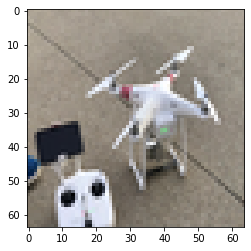

In [ ]:
#show one sample from each data array
plt.imshow(drone_data[19])

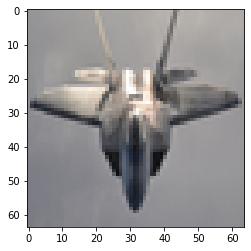

In [ ]:
plt.imshow(fighter_data[5])

In [ ]:
plt.imshow(helicopter_data[29])

In [ ]:
plt.imshow(missile_data[75])

In [ ]:
plt.imshow(plane_data[56])

In [ ]:
plt.imshow(rocket_data[68])

In [ ]:
drone_data_flat = drone_data.reshape(drone_data.shape[0], -1).T
fighter_data_flat = fighter_data.reshape(fighter_data.shape[0], -1).T
helicopter_data_flat = helicopter_data.reshape(helicopter_data.shape[0], -1).T
missile_data_flat = missile_data.reshape(missile_data.shape[0], -1).T
plane_data_flat = plane_data.reshape(plane_data.shape[0], -1).T
rocket_data_flat = rocket_data.reshape(rocket_data.shape[0], -1).T

In [ ]:
#concatenate all the data
data_flattened_without_label = np.concatenate((drone_data_flat,fighter_data_flat,helicopter_data_flat,missile_data_flat,plane_data_flat,rocket_data_flat), axis = 1).astype(np.float32)
data_flattened_without_label /= 255.0
print("Shape of the unlabeled data matrix: " + str(data_flattened_without_label.shape))

Shape of the unlabeled data matrix: (12288, 8078)


In [ ]:
#one-hot encoding of the labels
labels = np.array([1,0,0,0,0,0]).reshape(6,1)
f_ix = 0
l_ix = drone_data_flat.shape[1]
for i in range(f_ix +1, l_ix):
    labels = np.concatenate((labels, np.array([1,0,0,0,0,0]).reshape(6,1)), axis = 1)
f_ix += drone_data_flat.shape[1]
l_ix += fighter_data_flat.shape[1]
for i in range(f_ix, l_ix):
    labels = np.concatenate((labels, np.array([0,1,0,0,0,0]).reshape(6,1)), axis = 1)
f_ix += fighter_data_flat.shape[1]
l_ix += helicopter_data_flat.shape[1]
for i in range(f_ix, l_ix):
    labels = np.concatenate((labels, np.array([0,0,1,0,0,0]).reshape(6,1)), axis = 1)
f_ix += helicopter_data_flat.shape[1]
l_ix += missile_data_flat.shape[1]
for i in range(f_ix, l_ix):
    labels = np.concatenate((labels, np.array([0,0,0,1,0,0]).reshape(6,1)), axis = 1)
f_ix += missile_data_flat.shape[1]
l_ix += plane_data_flat.shape[1]
for i in range(f_ix, l_ix):
    labels = np.concatenate((labels, np.array([0,0,0,0,1,0]).reshape(6,1)), axis = 1)
f_ix += plane_data_flat.shape[1]
l_ix += rocket_data_flat.shape[1]
for i in range(f_ix, l_ix):
    labels = np.concatenate((labels, np.array([0,0,0,0,0,1]).reshape(6,1)), axis = 1)
print("Shape of the one-hot encoded label matrix: " + str(labels.shape))

Shape of the one-hot encoded label matrix: (6, 8078)


In [ ]:
indexes = [i for i in range(labels.shape[1])]
#shuufle the indexes
np.random.shuffle(indexes)
print(indexes[8000])
print(indexes[8000:-1])

3180
[3180, 2959, 5571, 316, 7192, 3172, 1727, 1680, 4548, 6189, 2470, 7961, 5932, 4045, 4990, 1359, 6325, 30, 1609, 254, 3788, 4371, 2457, 1433, 7088, 3469, 341, 5044, 4692, 612, 7777, 4981, 4508, 3836, 7116, 7662, 5565, 5938, 700, 3791, 3194, 6081, 2688, 4049, 6763, 5171, 6370, 5465, 3266, 5585, 5632, 869, 7713, 7495, 6701, 1952, 5914, 2211, 5903, 892, 513, 2603, 6484, 6469, 4067, 5349, 2248, 3998, 7929, 185, 5157, 7932, 8075, 4908, 2012, 3531, 3675]


In [ ]:
#divide the data into train and test along with the labels
train_percentage = int(labels.shape[1]*0.7) #use the 70% of the data as training data
train_data = data_flattened_without_label[:,indexes[0:train_percentage]]
train_label = labels[:,indexes[0:train_percentage]]
test_data = data_flattened_without_label[:,indexes[train_percentage:-1]]
test_label = labels[:,indexes[train_percentage:-1]]

print("shape of the training set and training label" + str([train_data.shape, train_label.shape]))
print("shape of the training set and training label" + str([test_data.shape, test_label.shape]))

shape of the training set and training label[(12288, 5654), (6, 5654)]
shape of the training set and training label[(12288, 2423), (6, 2423)]


In [ ]:
#initializing parameters for multiclass logistic regression (one-vs-all)
def initialize_parameters_LR(dataset_batch, num_classes):
    nx, m = dataset_batch.shape[0], dataset_batch.shape[1] #number of features, number of data points respectively
    W = np.random.randn(nx, num_classes) * 0.1
    b = np.zeros((num_classes, 1))
    return W, b

In [ ]:
W, b = initialize_parameters_LR(train_data, 6)
W.shape, b.shape

((12288, 6), (6, 1))

In [ ]:
def sigmoid(x): 
    return 1 / (1 + np.exp(x*-1))

# Our Logistic Regression Model Represented as a Shallow Neural Network
<img src="http://localhost:8888/notebooks/Desktop/Jupyter%20Projects/EE485/LRDiagram.png" style="width:400px;height:400px;">
We build the model such that, given the data matrix $X$ in the input layer, the output $\hat{y}$ is formulated with
$$\hat{Y} = \sigma(W^T X + b)$$ 
where $W$ is the weight matrix and $b$ is the bias vector. Here, each unit of the output layer is the prediction of the model for each class. 

We use the Cross-Entropy as loss function, 
$\hat{Y} = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
$J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

On the back-propagation stage, the gradients are calculated as,

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(\hat{Y}-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$

In [ ]:
#compute the cost and the values predicted by the model
def propagate(dataset, W, b, labels, regularization = "L2", llambda = 0.1):
    m = dataset.shape[1]
    #forward propagation==================================================================
    """
    print("dataset: " + str(dataset))
    print("W,b: " +str(W)+" "+str(b))
    print("mult: " + str(np.matmul(W.T, dataset)))
    """
    Z = np.matmul(W.T, dataset) + b
    #print("Z[0]: " + str(Z[0]))
    A = sigmoid(Z)
    costs = []
    for i in range(A.shape[0]):
        #print("labels[i]: " + str(labels[i]))
        #print("A[i]: " + str(A[i]))
        if(regularization == "none"):
          costs.append(np.sum(labels[i]*np.log(A[i]) + (1-labels[i])*np.log(1-A[i]))*(-1/m))
        elif(regularization == "L2"):
          costs.append(np.sum(labels[i]*np.log(A[i]) + (1-labels[i])*np.log(1-A[i]))*(-1/m) + ((llambda/(2*m)) * (np.sum(np.square(W)))))
    #=====================================================================================
    #print("costs: " + str(costs))
    #backward propagation=================================================================
    dZ = A - labels
    dW = np.matmul(dataset, dZ.T) * (1/m) + (llambda/m)*W
    db = (1/m)*np.sum(dZ, axis = 1).reshape(b.shape[0], b.shape[1])
    #print(str(dZ.shape) + " " + str(b.shape) + " " + str(db.shape))
    assert(dW.shape == (W.shape))
    assert(db.shape == (b.shape))
    
    return sum(costs), dW, db

In [ ]:
#using mini-batch of size 64 gradient descent
def train_datasetLR(dataset, labels, W, b, batch_size = 64, num_iterations = 1000, learning_rate = 0.05, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-5):
    costs = []
    minCost = 50
    vdW, sdW, vdb, sdb = 0, 0, 0, 0
    for i in range(num_iterations):
        #tmp_index = [i for i in range(dataset.shape[1])]
        #np.random.shuffle(tmp_index)
        for j in range(0, dataset.shape[1], batch_size):
            train_batch = dataset[:,j:j+batch_size]
            label_batch = labels[:, j:j+batch_size]
            #compute the costs and the gradients
            #print("Calculating the cost at iteration: " + str(i))
            cost, dW, db = propagate(train_batch, W, b, label_batch)
            vdW = beta1 * vdW + (1-beta1)*dW
            vdb = beta1 * vdb + (1-beta1)*db
            sdW = beta2 * sdW + (1-beta2)*(dW**2)
            sdb = beta2 * sdb + (1-beta2)*(db**2)
            #print("vdw, vdb, sdw, sdb: " + str(vdW)+str(vdb)+str(sdW)+str(sdb))
            vdWcor = vdW / (1 - (beta1**(i+1)))
            vdbcor = vdb / (1 - (beta1**(i+1)))
            sdWcor = sdW / (1 - (beta2**(i+1)))
            sdbcor = sdb / (1 - (beta2**(i+1)))
            #print("vdwcor, vdb, sdw, sdb: " + str(vdWcor)+str(vdbcor)+str(sdWcor)+str(sdbcor))
            if(minCost > cost):
                minCost = cost
            
            #update the values with gradients and learning rate
            #print("W,b bef:" + str(W)+str(b))
            W = W - learning_rate * vdWcor / ((sdWcor)**(0.5) + epsilon)
            b = b - learning_rate * vdbcor / ((sdbcor)**(0.5) + epsilon)
            
            #print("W,b after:" + str(W)+str(b))
            
            if(i % 500 == 0 and j == 0):
                print("Cost after iteration " + str(i) + ": " + str(cost))
                costs.append(cost)
    
    plt.title("Change of costs in time")
    plt.xlabel("number of iterations")
    plt.ylabel("cost")
    plt.plot(costs)
    print("Minimum cost obtained: " + str(minCost))
    return W, b

In [ ]:
tt = 5000
bs = 32
ttt = [x for x in range(tt)]
for i in range(3):
    print("cycle")
    for j in range(0, tt, bs):
        print(ttt[j:j+bs])
"""for i in range(tt - tt%bs, tt):
    print(i)"""

In [ ]:
W, b = initialize_parameters_LR(train_data, train_label.shape[0])
W, b = train_datasetLR(train_data, train_label,  W, b, batch_size = 128, num_iterations = 10000,learning_rate = 0.0005, beta1 = 0.9, epsilon = 1e-8)
#weights.append([W,b])


Cost after iteration 0: 22.20548975859383
Cost after iteration 500: 2.8177062297754265
Cost after iteration 1000: 2.482336915512596
Cost after iteration 1500: 2.5434201483275594
Cost after iteration 2000: 2.584896201330383
Cost after iteration 2500: 2.6325612141541384
Cost after iteration 3000: 2.736346780535752
Cost after iteration 3500: 2.701382184007264
Cost after iteration 4000: 2.7417569007772715
Cost after iteration 4500: 2.7346857870662014
Cost after iteration 5000: 2.7666999077516845
Cost after iteration 5500: 2.762562335444364
Cost after iteration 6000: 2.7542607935970396
Cost after iteration 6500: 2.7557778662089443
Cost after iteration 7000: 2.745757521064802
Cost after iteration 7500: 2.748455841962264
Cost after iteration 8000: 2.812871633808153


In [ ]:
def predict(dataset, W, b, labels):
    Z = np.matmul(W.T, dataset) + b
    A = sigmoid(Z)
    m = dataset.shape[1]
    true_pred = 0
    preds = []
    for i in range(A.shape[1]):
        pred_ix = np.argmax(A.T[i])
        if(labels.T[i][pred_ix] == 1):
            true_pred += 1
        preds.append(pred_ix)
    return true_pred / m, preds

Cost after iteration 0: 3.7168679125102084
Cost after iteration 500: 3.788239006928505
Cost after iteration 1000: 3.7156041996084226
Cost after iteration 1500: 3.4879187026283294
Cost after iteration 2000: 3.4893878040602595
Cost after iteration 2500: 3.7218500624366753
Cost after iteration 3000: 3.314160620503146
Cost after iteration 3500: 3.3489093017122444
Cost after iteration 4000: 3.32578049340428
Cost after iteration 4500: 3.1816072166392857
Cost after iteration 5000: 3.1280649652038375
Cost after iteration 5500: 3.2973335113484556
Cost after iteration 6000: 3.103081032672552
Cost after iteration 6500: 3.320235999932722
Cost after iteration 7000: 3.0768259234711923
Cost after iteration 7500: 3.196578093559781
Cost after iteration 8000: 3.091162822869412
Cost after iteration 8500: 3.200708092984914
Cost after iteration 9000: 3.1658736247049695
Cost after iteration 9500: 3.221368741154849
Minimum cost obtained: 2.845060926205822


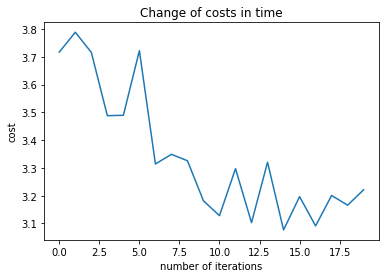

In [ ]:
W1, b1 = np.load(input_path + "90-33acc_W.npy"), np.load(input_path + "90-33acc_b.npy")
W2, b2 = train_datasetLR(train_data, train_label,  W1, b1, batch_size = 128, num_iterations = 10000,learning_rate = 0.0005, beta1 = 0.9, epsilon = 1e-8)

In [ ]:
train_accuracy, predstrain = predict(train_data, W2,b2, train_label) 
test_accuracy, predstest = predict(test_data, W2,b2, test_label)
print("Training set accuracy: " + str(train_accuracy))
print("Test set accuracy: " + str(test_accuracy))

Training set accuracy: 0.7958967102935974
Test set accuracy: 0.5683037556747833


In [ ]:
np.save(input_path + "90-33acc_W", W)
np.save(input_path + "90-33acc_b", b)

In [ ]:
train_label[:,100], predstrain[100]

(array([0, 0, 0, 1, 0, 0]), 3)